In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

In [58]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
data = pd.read_csv("data/house-price-prediction.csv")

In [4]:
data

,House Price,Square Feet
0,245,1400
1,312,1600
2,279,1700
3,308,1875
4,199,1100
5,219,1550
6,405,2350
7,324,2450
8,319,1425
9,255,1700


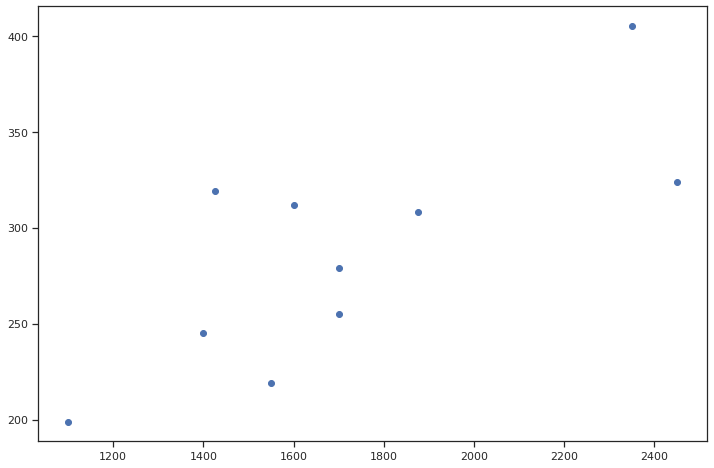

In [5]:
plt.figure(figsize = (12, 8))
plt.scatter(data["Square Feet"], data["House Price"])
plt.show()

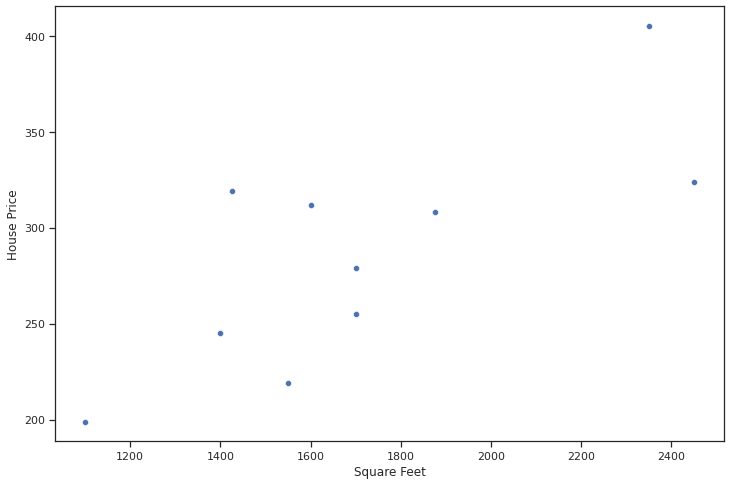

In [6]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x=data["Square Feet"], y=data["House Price"])
plt.show()

In [7]:
X = np.concatenate(([np.repeat(0, data["Square Feet"].values.size)], [data["Square Feet"].values]), axis = 0).T
y = data["House Price"].values

In [8]:
lm = LinearRegression().fit(X, y)
y_pred = lm.predict(X)

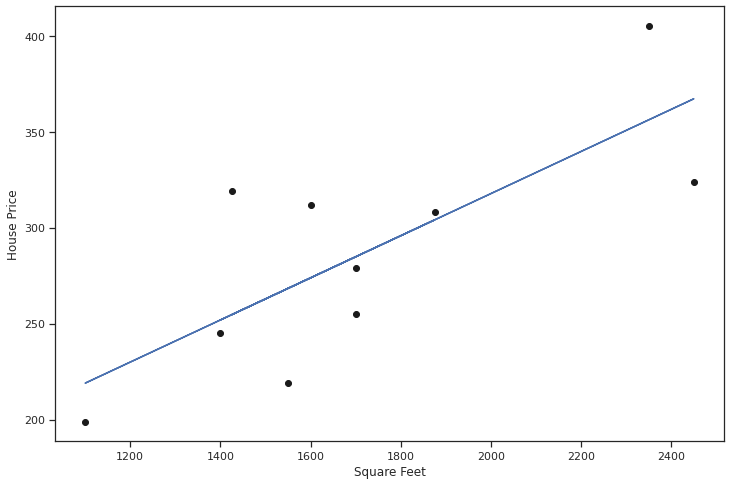

In [9]:
plt.figure(figsize = (12, 8))
plt.scatter(data["Square Feet"], data["House Price"], color="k")
plt.plot(data["Square Feet"], y_pred)
plt.xlabel("Square Feet")
plt.ylabel("House Price")
plt.show()

In [10]:
cr_df = pd.read_csv("data/consumo-renda.csv")

In [11]:
cr_df

,Ano,Y CONSUMO,X RENDA
0,1982,3081.5,4620.3
1,1983,3240.6,4803.7
2,1984,3407.6,5140.1
3,1985,3566.5,5323.5
4,1986,3708.7,5487.7
5,1987,3822.3,5649.5
6,1988,3972.7,5865.2
7,1989,4064.6,6062.0
8,1990,4132.2,6136.3
9,1991,4105.8,6079.4


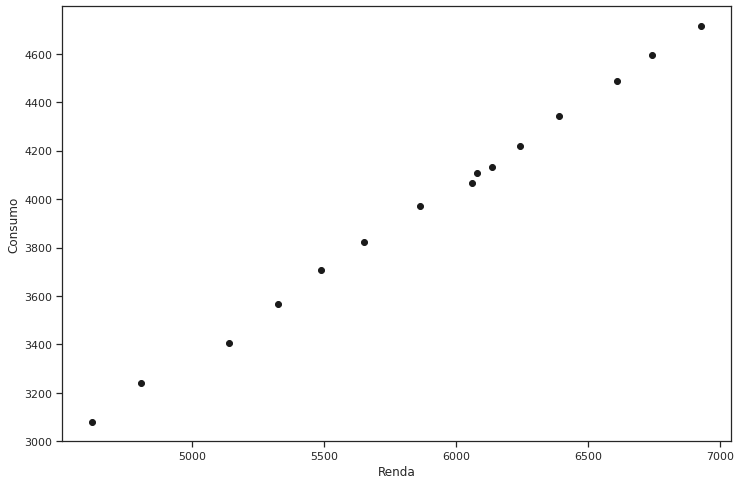

In [12]:
plt.figure(figsize = (12, 8))
plt.scatter(cr_df["X RENDA"], cr_df["Y CONSUMO"], color="k")
plt.xlabel("Renda")
plt.ylabel("Consumo")
plt.show()

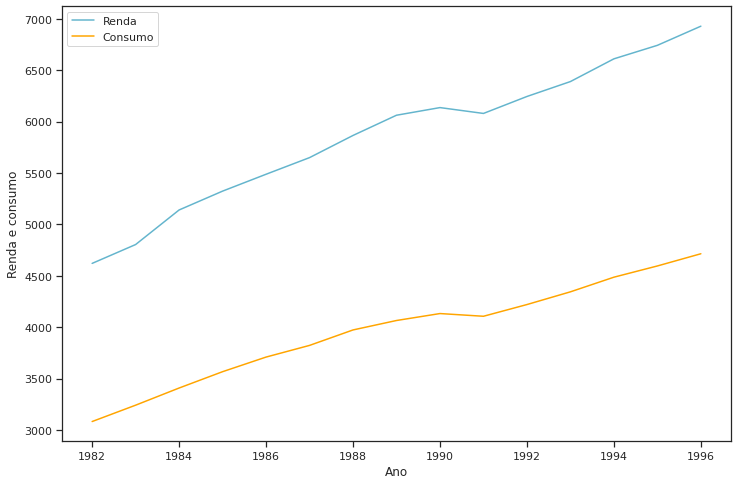

In [13]:
plt.figure(figsize = (12, 8))
plt.plot(cr_df["Ano"], cr_df["X RENDA"], color = "c", label="Renda")
plt.plot(cr_df["Ano"], cr_df["Y CONSUMO"], color = "orange", label = "Consumo")
plt.xlabel("Ano")
plt.ylabel("Renda e consumo")
plt.legend()
plt.show()

In [14]:
sales_yt = pd.read_csv("data/sales-social-media.csv")

In [15]:
sales_yt

,youtube,facebook,newspaper,sales
0,276.12,45.36,83.04,26.52
1,53.40,47.16,54.12,12.48
2,20.64,55.08,83.16,11.16
3,181.80,49.56,70.20,22.20
4,216.96,12.96,70.08,15.48
...,...,...,...,...
195,45.84,4.44,16.56,9.12
196,113.04,5.88,9.72,11.64
197,212.40,11.16,7.68,15.36
198,340.32,50.40,79.44,30.60


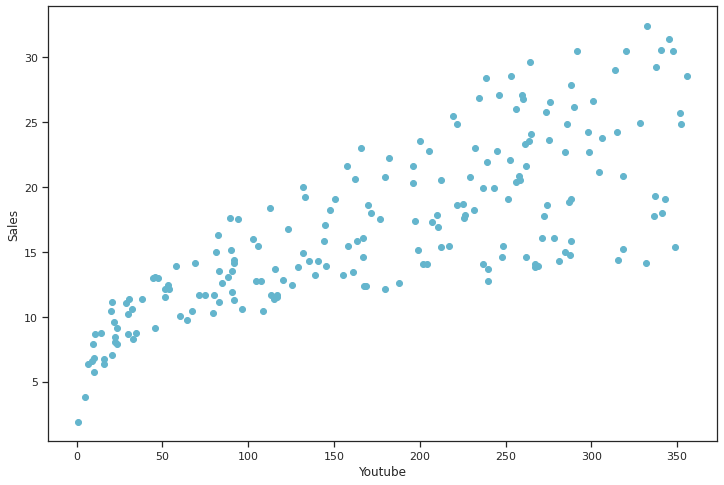

In [16]:
plt.figure(figsize = (12, 8))
plt.scatter(sales_yt["youtube"], sales_yt["sales"], color = "c")
# #plt.plot(cr_df["Ano"], cr_df["Y CONSUMO"], color = "orange", label = "Consumo")
plt.xlabel("Youtube")
plt.ylabel("Sales")
plt.show()

In [17]:
yt_sales_values = sales_yt["youtube"].values
X = np.concatenate(([np.repeat(0, yt_sales_values.size)], [yt_sales_values]), axis = 0).T
y = sales_yt["sales"].values

In [18]:
y_pred  = LinearRegression().fit(X, y).predict(X)

In [29]:
log_y = np.log(y)
curve_fit = np.polyfit(yt_sales_values, log_y, 1)
print(curve_fit)

[0.00315554 2.18951378]


In [30]:
#y_pred_ln = np.exp(2.18951378) * np.exp(0.00315554 * yt_sales_values)
y_pred_ln = np.exp(LinearRegression().fit(X, np.log(y)).predict(X))

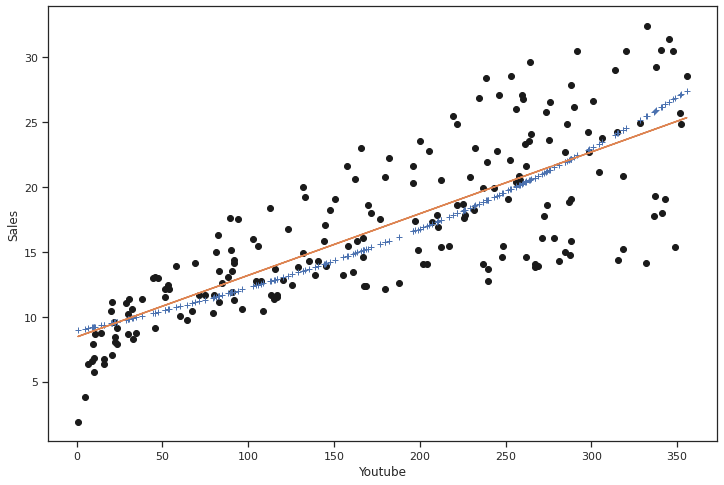

In [32]:
plt.figure(figsize = (12, 8))
plt.scatter(sales_yt["youtube"], sales_yt["sales"], color = "k")
plt.plot(sales_yt["youtube"], y_pred_ln, "+")
plt.plot(sales_yt["youtube"], y_pred)
plt.xlabel("Youtube")
plt.ylabel("Sales")
plt.show()

In [36]:
# Credit Score

In [41]:
credit_score_df = pd.read_csv("data/credit-score.csv")

# ST = y
# R = Renda
# ND = Número de Dependentes
# VE = Vinculo empregatício

In [42]:
X = credit_score_df[["R", "ND", "VE"]]
y = credit_score_df["ST"]

In [44]:
lm = LogisticRegression().fit(X, y)

In [54]:
y_pred = lm.predict(X)

In [59]:
cm = confusion_matrix(y, y_pred)

<Figure size 864x576 with 0 Axes>

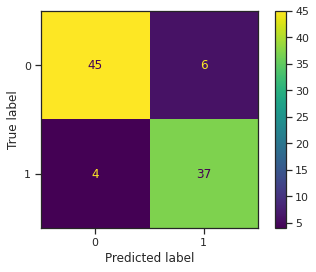

In [62]:
plt.figure(figsize = (12, 8))
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [63]:
Exercicions

array([0, 1])